# 1. 发散现象

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [321]:
#设置默认的参数
Length=3.0
T_max=1.0 
Alpha=1.0

#CFL=Alpha*(dt/dx)

def initialize(num_T,num_X):
    u=np.zeros((num_T,num_X), dtype=np.float64)
    x_vals=np.linspace(0,Length,num_X)
    u[0,:]=np.sin(2 * np.pi * x_vals)
    return u

def periodic(u,n):
    u[n,0]=u[n,-2]
    u[n,-1]=u[n,1] #Ghost cells

def true(num_T,num_X):
    u=np.zeros((num_T,num_X))
    dx,dt=Length/(num_X-1),T_max/(num_T-1)
    for n in range(num_T):
        for j in range(num_X):
            u[n,j]=np.sin(2*np.pi*(j*dx-n*dt))
    return u

### （1）Lax格式

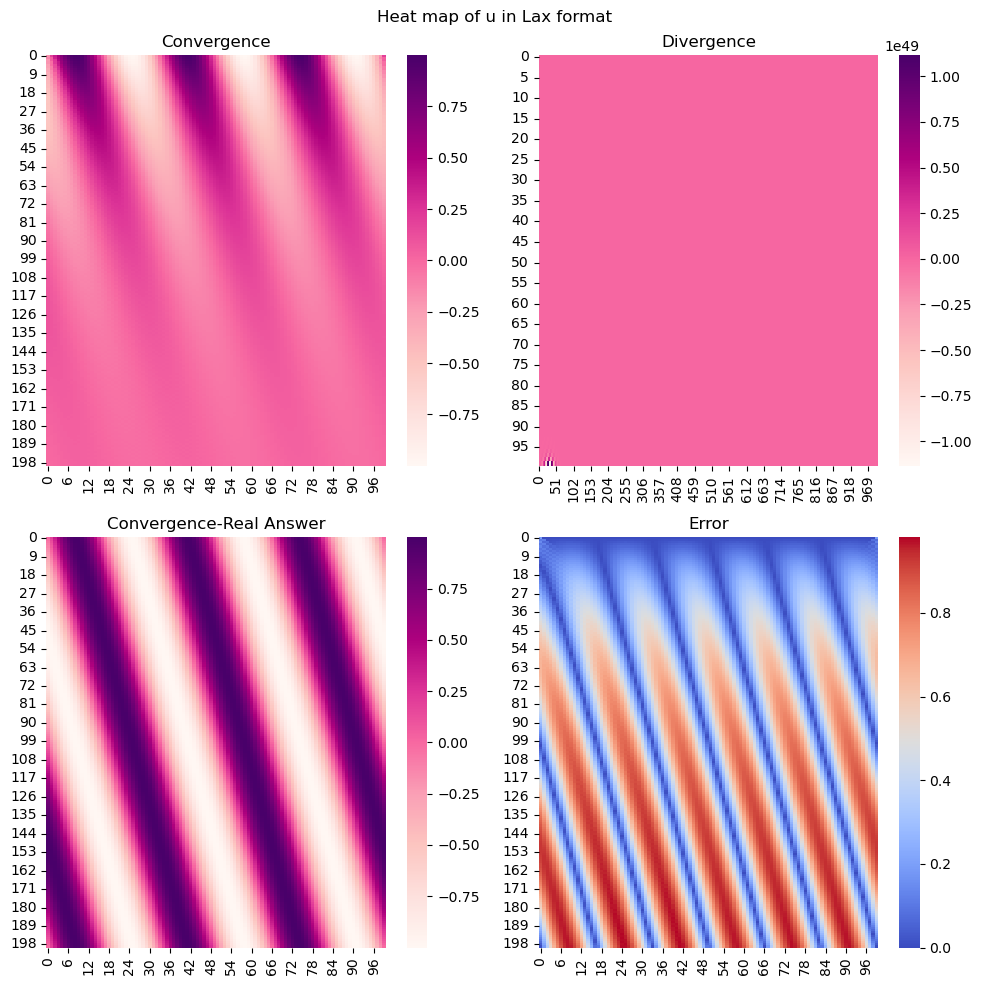

In [242]:
def lax(num_T,num_X):
    u=initialize(num_T,num_X)
    dx,dt=Length/(num_X-1),T_max/(num_T-1)
    periodic(u,0)
    c=Alpha*dt/dx
    for n in range(num_T-1):
        for j in range(num_X-1):
            u[n+1,j]=1/2*(1-c)*u[n,j+1]+1/2*(1+c)*u[n,j-1]
        periodic(u,n+1)
    return u

#CFL=Alpha*dt/dx=Alpha*(num_X/num_T)*(T_max/Length)=1/3*num_X/num_T
num_T_1=200
num_X_1=100
#此时CFL=1/6,收敛 
num_T_2=100
num_X_2=1000
#此时CFL=10/3,发散 

fig_1,axes=plt.subplots(2,2,figsize=(10,10))
fig_1.suptitle("Heat map of u in Lax format")
ax=plt.subplot(2,2,1)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Convergence")
sns.heatmap(lax(num_T_1,num_X_1),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,2)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Divergence")
sns.heatmap(lax(num_T_2,num_X_2),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,3)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Convergence-Real Answer")
sns.heatmap(true(num_T_1,num_X_1),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,4)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Error")
sns.heatmap(np.abs(lax(num_T_1,num_X_1)-true(num_T_1,num_X_1)),ax=ax,cmap = "coolwarm")

plt.tight_layout()
plt.savefig("Lax_1.png")
plt.show()

### (2)Lax-Wendroff格式

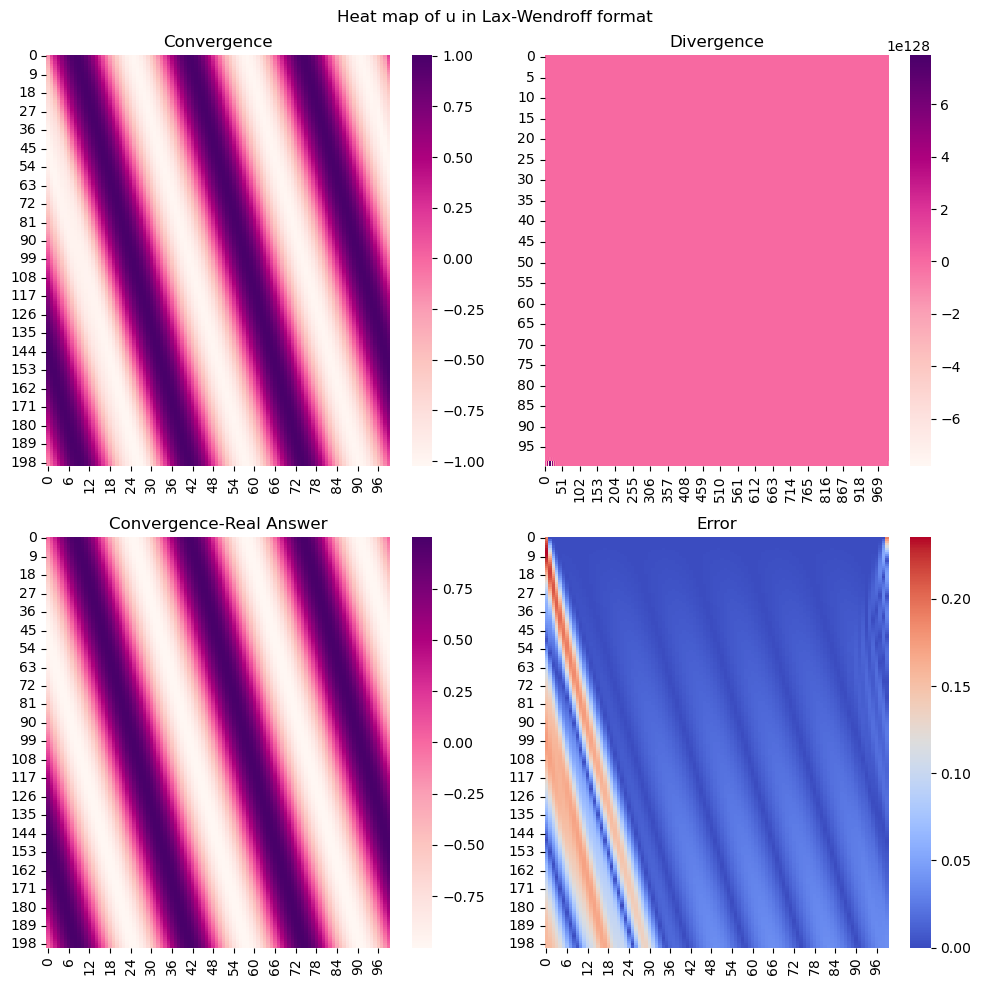

In [243]:
def lax_W(num_T,num_X):
    u=initialize(num_T,num_X)
    periodic(u,0)
    dx,dt=Length/(num_X-1),T_max/(num_T-1)
    c=Alpha*dt/dx
    for n in range(num_T-1):
        for j in range(1,num_X-1):
            u[n+1,j]=u[n,j]-c/2*(u[n,j+1]-u[n,j-1])+1/2*c*c*(u[n,j+1]-2*u[n,j]+u[n,j-1])
        periodic(u,n+1)
    return u



#CFL=Alpha*dt/dx=Alpha*(num_X/num_T)*(T_max/Length)=1/3*num_X/num_T
num_T_1=200
num_X_1=100
#此时CFL=1/6,收敛 
num_T_2=100
num_X_2=1000
#此时CFL=10/3,发散 

fig_1,axes=plt.subplots(2,2,figsize=(10,10))
fig_1.suptitle("Heat map of u in Lax-Wendroff format")
ax=plt.subplot(2,2,1)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Convergence")
sns.heatmap(lax_W(num_T_1,num_X_1),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,2)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Divergence")
sns.heatmap(lax_W(num_T_2,num_X_2),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,3)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Convergence-Real Answer")
sns.heatmap(true(num_T_1,num_X_1),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,4)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Error")
sns.heatmap(np.abs(lax_W(num_T_1,num_X_1)-true(num_T_1,num_X_1)),ax=ax,cmap = "coolwarm")

plt.tight_layout()
plt.savefig("Lax_Wendroff_1.png")
plt.show()

### (3)迎风格式

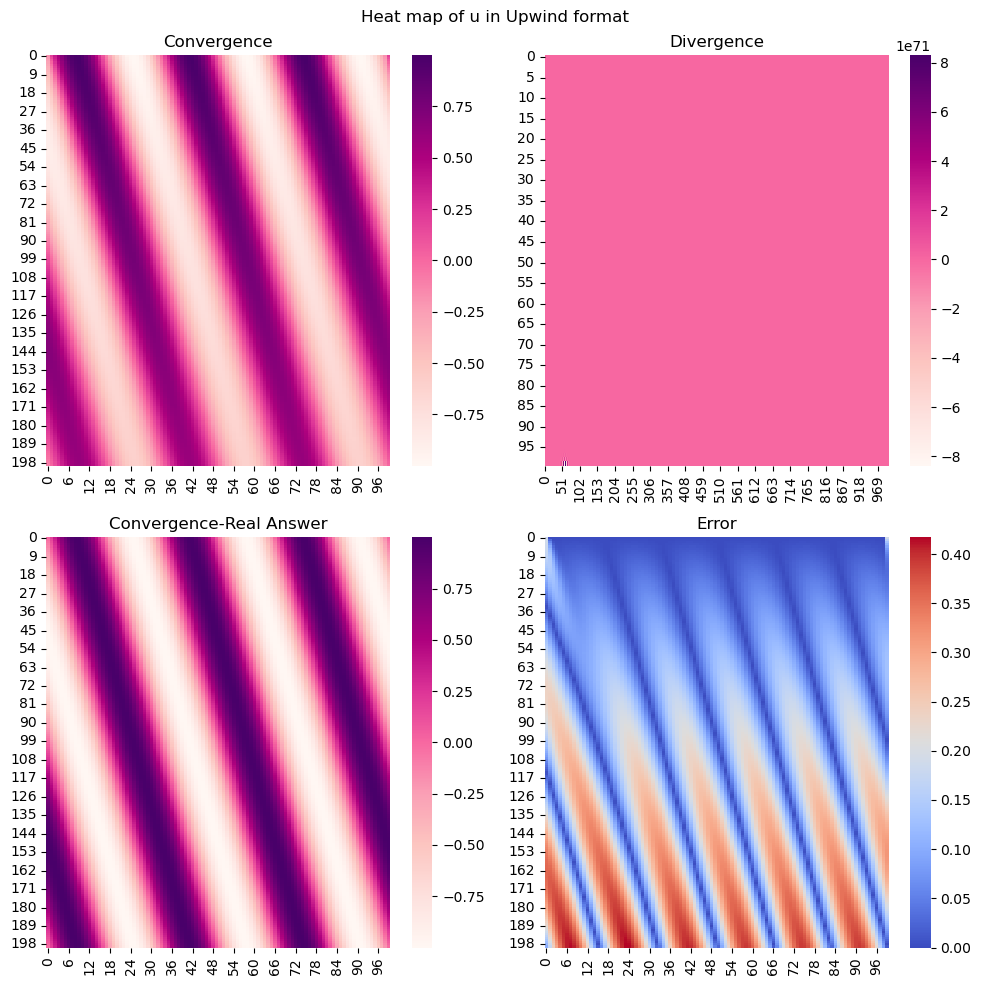

In [244]:
def wind(num_T,num_X):
    u=initialize(num_T,num_X)
    dx,dt=Length/(num_X-1),T_max/(num_T-1)
    periodic(u,0)
    c=Alpha*dt/dx
    for n in range(num_T-1):
        for j in range(1,num_X-1):
            u[n+1,j]=u[n,j]-c*(u[n,j]-u[n,j-1])
        periodic(u,n+1)
    return u

#CFL=Alpha*dt/dx=Alpha*(num_X/num_T)*(T_max/Length)=1/3*num_X/num_T
num_T_1=200
num_X_1=100
#此时CFL=1/6,收敛 
num_T_2=100
num_X_2=1000
#此时CFL=10/3,发散 

fig_1,axes=plt.subplots(2,2,figsize=(10,10))
fig_1.suptitle("Heat map of u in Upwind format")
ax=plt.subplot(2,2,1)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Convergence")
sns.heatmap(wind(num_T_1,num_X_1),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,2)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Divergence")
sns.heatmap(wind(num_T_2,num_X_2),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,3)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Convergence-Real Answer")
sns.heatmap(true(num_T_1,num_X_1),ax=ax,cmap = 'RdPu')

ax=plt.subplot(2,2,4)
ax.set_xlabel("T")
ax.set_ylabel("x")
ax.set_title("Error")
sns.heatmap(np.abs(wind(num_T_1,num_X_1)-true(num_T_1,num_X_1)),ax=ax,cmap = "coolwarm")

plt.tight_layout()
plt.savefig("Upwind_1.png")
plt.show()

# 2. 精度阶数

## 空间

In [339]:
num_T=800
Steps=np.arange(200, 401, 10)
N=int(num_T/2)
#CFL=Alpha*dt/dx=Alpha*(num_X/num_T)*(T_max/Length)=1/3*num_X/num_T，此时全都收敛
Error_l=[]
Error_lw=[]
Error_w=[]
for step in Steps:
    J=int(step/2)
    print(step,"CFL",1/3*step/num_T)
    true_value=true(num_T,step)
    Lax=lax(num_T,step)
    Lax_W=lax_W(num_T,step)
    Wind=wind(num_T,step)
    # Error_l.append(np.sqrt(np.mean((Lax[N,J]-true_value[N,J])**2)))
    # Error_lw.append(np.sqrt(np.mean((Lax_W[N,J]-true_value[N,J])**2)))
    # Error_w.append(np.sqrt(np.mean((Wind[N,J]-true_value[N,J])**2)))
    Error_l.append(np.abs(Lax[N,J]-true_value[N,J]))
    Error_lw.append(np.abs(Lax_W[N,J]-true_value[N,J]))
    Error_w.append(np.abs(Wind[N,J]-true_value[N,J]))

200 CFL 0.08333333333333331
210 CFL 0.0875
220 CFL 0.09166666666666666
230 CFL 0.09583333333333333
240 CFL 0.1
250 CFL 0.10416666666666666
260 CFL 0.10833333333333332
270 CFL 0.1125
280 CFL 0.11666666666666665
290 CFL 0.12083333333333332
300 CFL 0.125
310 CFL 0.12916666666666665
320 CFL 0.13333333333333333
330 CFL 0.1375
340 CFL 0.14166666666666666
350 CFL 0.14583333333333331
360 CFL 0.15
370 CFL 0.15416666666666667
380 CFL 0.15833333333333333
390 CFL 0.1625
400 CFL 0.16666666666666663


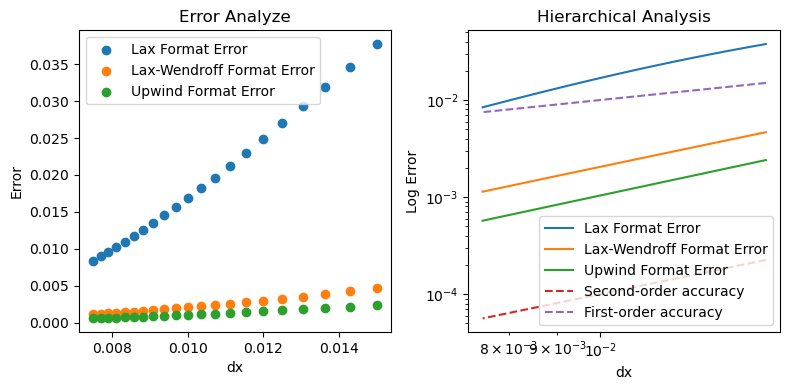

In [340]:
column,row=2,1
dx_vals=Length/Steps
fig,axes = plt.subplots(row,column,figsize=(4*column, 4*row))

axes=axes.flatten()
ax=axes[0]
ax.set_xlabel("dx")
ax.set_ylabel("Error")
ax.set_title("Error Analyze")
ax.scatter(dx_vals,Error_l,label='Lax Format Error')
ax.scatter(dx_vals,Error_lw,label='Lax-Wendroff Format Error')
ax.scatter(dx_vals,Error_w,label='Upwind Format Error')
ax.legend()
ax=axes[1]
ax.set_xlabel("dx")
ax.set_ylabel("Log Error")
ax.set_title("Hierarchical Analysis")
ax.loglog(dx_vals,Error_l ,label='Lax Format Error')
ax.loglog(dx_vals,Error_lw,label='Lax-Wendroff Format Error')
ax.loglog(dx_vals,Error_w,label='Upwind Format Error')
ax.loglog(dx_vals,dx_vals**2,'--',label='Second-order accuracy')
ax.loglog(dx_vals,dx_vals,'--',label='First-order accuracy')
ax.legend()


plt.tight_layout()
plt.savefig("Accuracy_Space.png")
plt.show()

## 时间

In [342]:
num_X=400
Steps_2=np.arange(600, 801, 10) 

Error_l=[]
Error_lw=[]
Error_w=[]
for step in Steps_2: 
    print(step,"CFL",1/3*num_X/step)
    true_value=true(step,num_X)
    Lax=lax(step,num_X)
    Lax_W=lax_W(step,num_X)
    Wind=wind(step,num_X)
    Error_l.append(np.sqrt(np.mean((Lax[:10,:]-true_value[:10,:])**2)))
    Error_lw.append(np.sqrt(np.mean((Lax_W[:10,:]-true_value[:10,:])**2)))
    Error_w.append(np.sqrt(np.mean((Wind[:10,:]-true_value[:10,:])**2)))

600 CFL 0.22222222222222218
610 CFL 0.21857923497267756
620 CFL 0.2150537634408602
630 CFL 0.2116402116402116
640 CFL 0.20833333333333331
650 CFL 0.2051282051282051
660 CFL 0.202020202020202
670 CFL 0.1990049751243781
680 CFL 0.196078431372549
690 CFL 0.19323671497584538
700 CFL 0.19047619047619044
710 CFL 0.1877934272300469
720 CFL 0.18518518518518515
730 CFL 0.18264840182648398
740 CFL 0.18018018018018014
750 CFL 0.17777777777777776
760 CFL 0.17543859649122803
770 CFL 0.17316017316017313
780 CFL 0.17094017094017092
790 CFL 0.16877637130801684
800 CFL 0.16666666666666663


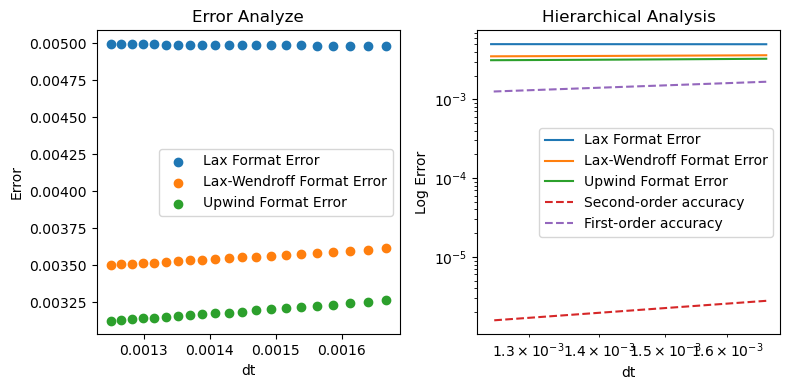

In [343]:
column,row=2,1
dt_vals=T_max/Steps_2
fig,axes = plt.subplots(row,column,figsize=(4*column, 4*row))

axes=axes.flatten()
ax=axes[0]
ax.set_xlabel("dt")
ax.set_ylabel("Error")
ax.set_title("Error Analyze")
ax.scatter(dt_vals,Error_l,label='Lax Format Error')
ax.scatter(dt_vals,Error_lw,label='Lax-Wendroff Format Error')
ax.scatter(dt_vals,Error_w,label='Upwind Format Error')
ax.legend()
ax=axes[1]
ax.set_xlabel("dt")
ax.set_ylabel("Log Error")
ax.set_title("Hierarchical Analysis")
ax.loglog(dt_vals,Error_l ,label='Lax Format Error')
ax.loglog(dt_vals,Error_lw,label='Lax-Wendroff Format Error')
ax.loglog(dt_vals,Error_w,label='Upwind Format Error')
ax.loglog(dt_vals,dt_vals**2,'--',label='Second-order accuracy')
ax.loglog(dt_vals,dt_vals,'--',label='First-order accuracy')
ax.legend()


plt.tight_layout()
plt.savefig("Accuracy_Time.png")
plt.show()

# 3. 数值解的耗散以及相位的超前和滞后

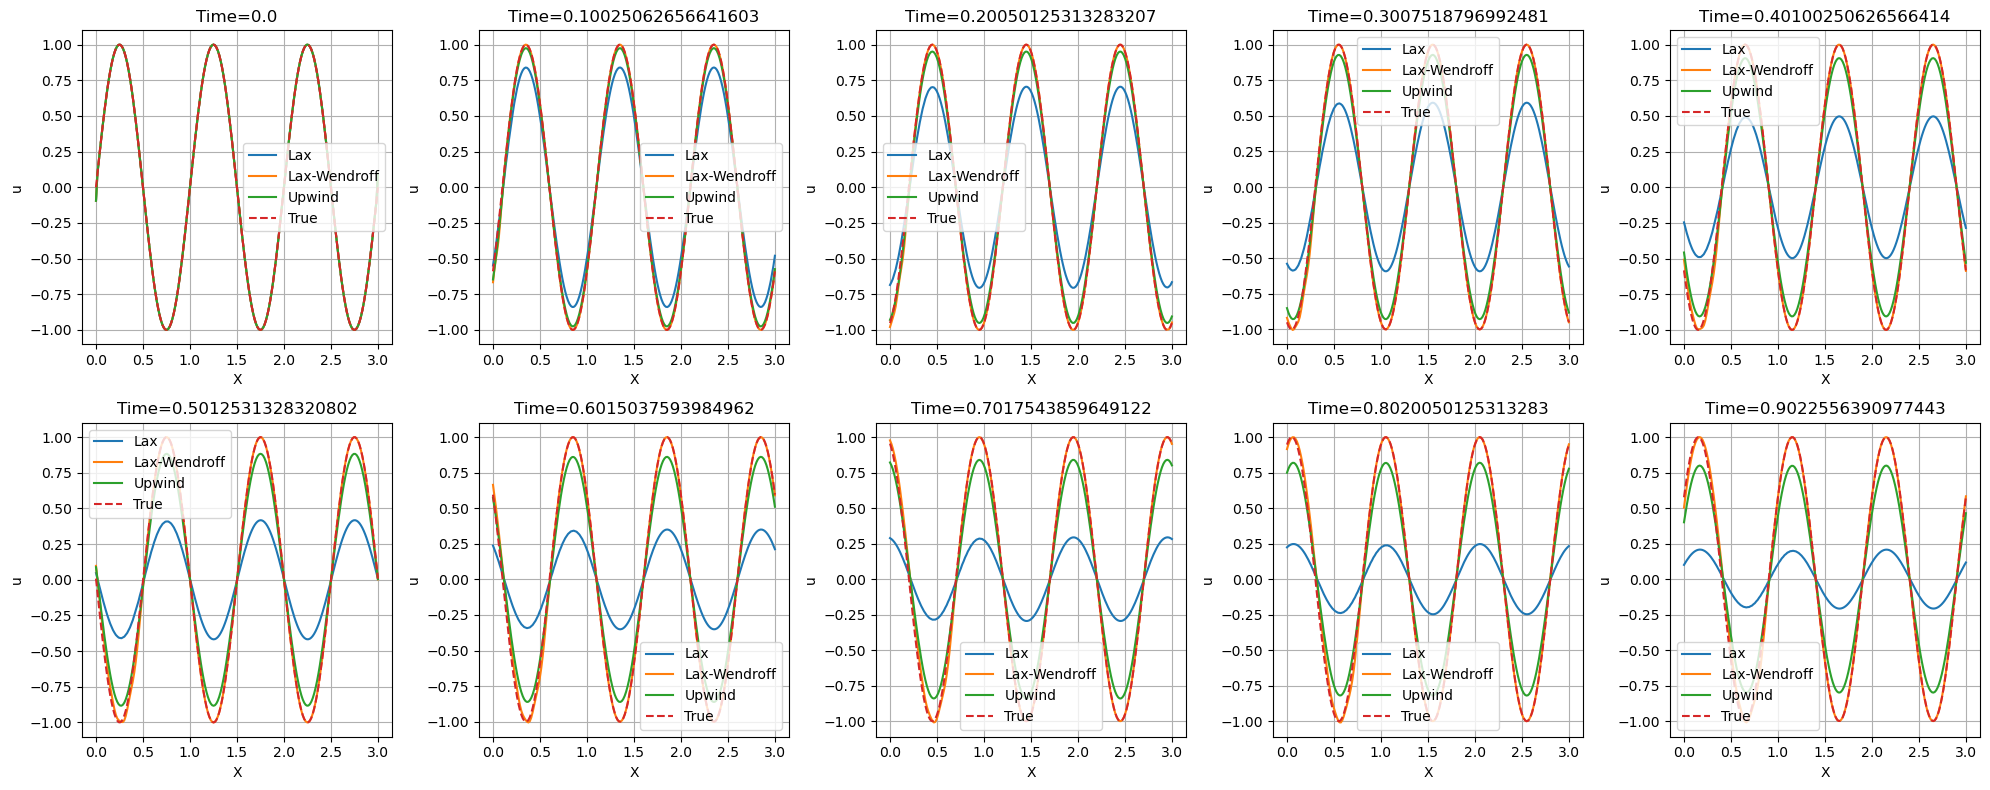

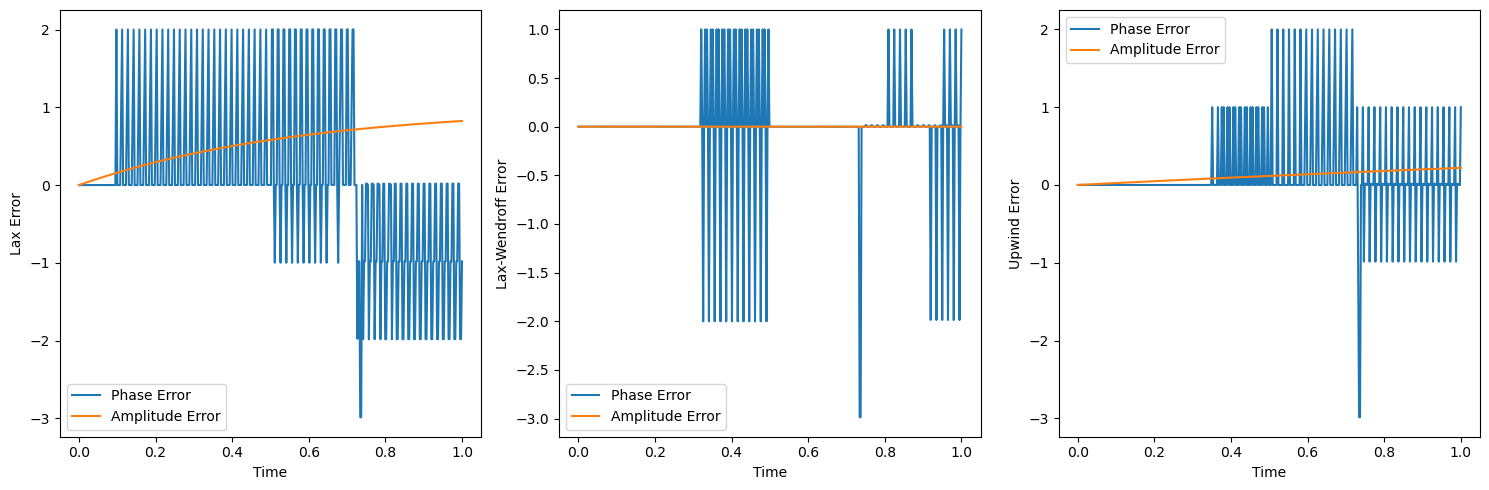

In [247]:
num_T=400
num_X=200
dx=Length/(num_X-1)
dt=T_max/(num_T-1)
#此时收敛
amplitude={"Lax":[],"Lax_W":[],"Upwind":[]}
phase={"Lax":[],"Lax_W":[],"Upwind":[]}
def Amplitude(u,true):
    return (np.max(true)-np.max(u))
def Phase(u, true, dx):
    def subpixel_peak(signal):
        peak = np.argmax(signal)
        if 0 < peak < len(signal)-1:
            y0, y1, y2 = signal[peak-1], signal[peak], signal[peak+1]
            correction = 0.5 * (y0 - y2) / (y0 - 2*y1 + y2)
            return (peak + correction) * dx
        else:
            return peak * dx
    return subpixel_peak(u) - subpixel_peak(true)



true_value=true(num_T,num_X)
Lax=lax(num_T,num_X)
Lax_W=lax_W(num_T,num_X)
Wind=wind(num_T,num_X)

fig,axes=plt.subplots(2,5,figsize=(20,8))
axes=axes.flatten()
flag=0
for n in range(num_T):
    u_exact_n = np.sin(2 * np.pi * (np.linspace(0, Length,num_X) - n*dt ))
    phase["Lax"].append(Phase(Lax[n,:],u_exact_n,dx))
    amplitude["Lax"].append(Amplitude(Lax[n,:],u_exact_n))
    phase["Lax_W"].append(Phase(Lax_W[n,:],u_exact_n,dx))
    amplitude["Lax_W"].append(Amplitude(Lax_W[n,:],u_exact_n))
    phase["Upwind"].append(Phase(Wind[n,:],u_exact_n,dx))
    amplitude["Upwind"].append(Amplitude(Wind[n,:],u_exact_n))
    if n%40==0:
        ax=axes[flag]
        flag+=1
        ax.plot(np.linspace(0, Length,num_X),Lax[n,:],label='Lax')
        ax.plot(np.linspace(0, Length,num_X),Lax_W[n,:],label='Lax-Wendroff')
        ax.plot(np.linspace(0, Length,num_X),Wind[n,:],label='Upwind')
        ax.plot(np.linspace(0, Length,num_X),true_value[n,:],'--',label='True')
        ax.set_xlabel("X")
        ax.set_ylabel("u")
        ax.grid(True)
        ax.set_title(f"Time={n*dt}")
        ax.legend()
plt.tight_layout()
plt.savefig("Display.png")
plt.show()

fig,axes=plt.subplots(1,3,figsize=(15,5))
axes=axes.flatten()
ax=axes[0]
ax.plot(np.linspace(0,T_max,num_T),phase["Lax"],label="Phase Error")
ax.plot(np.linspace(0,T_max,num_T),amplitude["Lax"],label="Amplitude Error")
ax.set_xlabel("Time")
ax.set_ylabel("Lax Error")
ax.legend()
ax=axes[1]
ax.plot(np.linspace(0,T_max,num_T),phase["Lax_W"],label="Phase Error")
ax.plot(np.linspace(0,T_max,num_T),amplitude["Lax_W"],label="Amplitude Error")
ax.set_xlabel("Time")
ax.set_ylabel("Lax-Wendroff Error")
ax.legend()
ax=axes[2]
ax.plot(np.linspace(0,T_max,num_T),phase["Upwind"],label="Phase Error")
ax.plot(np.linspace(0,T_max,num_T),amplitude["Upwind"],label="Amplitude Error")
ax.set_xlabel("Time")
ax.set_ylabel("Upwind Error")
ax.legend()


plt.tight_layout()
plt.savefig("Phase&Amplitude.png")
plt.show()